# 1) IMPORTING LIBRARIES


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 2) CLONING DATASET

In [ ]:
# CLONING THE DATASET FROM THE GITHUB REPOSITORY
!git clone https://github.com/RavindraKupatkar/RavindraKupatkar.git


Cloning into 'RavindraKupatkar'...
remote: Enumerating objects: 2304, done.
remote: Total 2304 (delta 0), reused 0 (delta 0), pack-reused 2304
Receiving objects: 100% (2304/2304), 1.31 GiB | 26.28 MiB/s, done.
Checking out files: 100% (2298/2298), done.


In [ ]:
import os

main_dir = "/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/"

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(main_dir, "train")
test_dir = os.path.join(main_dir, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [ ]:
# MAKING SEPERATE FILES : 
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

# 3) PERFORMING DATA VISUALIZATION



['/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(162).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(168).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(99).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(229).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(386).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(6).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(359).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/COVID19/COVID19(336).jpg']
['/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/NORMAL/NORMAL(1408).jpg', '/content/RavindraKupatkar/Datasets/Covid19/datasets-master/Data/train/NORMAL/NORMAL(1507).jpg', '/content/RavindraKupat

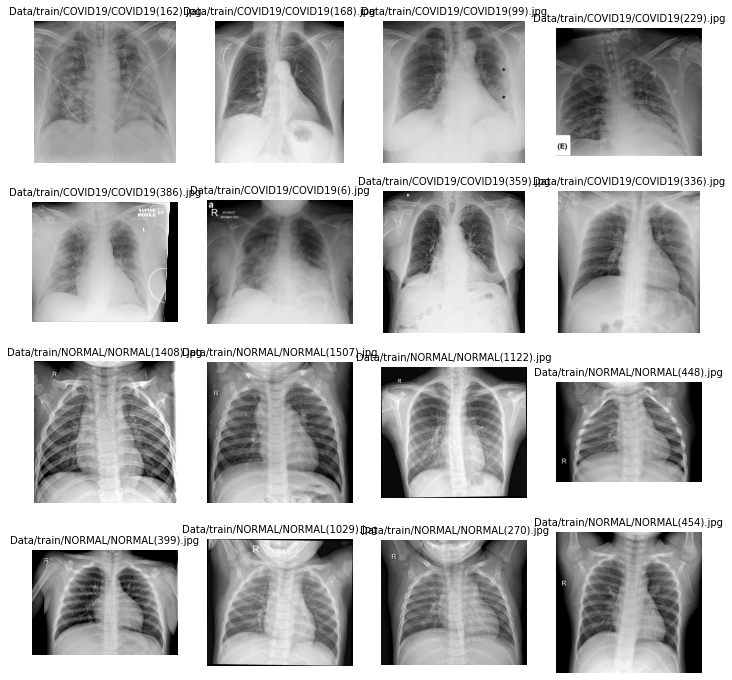

In [ ]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 10)
  plt.imshow(img, cmap= "gray")

plt.show()

# 4) DATA PREPROCESSING AND AUGMENTATION

In [ ]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150), 
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150), 
                                                      subset = "validation", 
                                                      batch_size = 32, 
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150), 
                                               batch_size = 32, 
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


# 5) BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

# 6) COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [ ]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# TRAINING THE MODEL
history = model.fit(train_generator, 
                    epochs = 35, 
                    validation_data = validation_generator)

Epoch 1/35
46/46 [==============================] - 58s 999ms/step - loss: 0.8798 - accuracy: 0.8054 - val_loss: 0.2467 - val_accuracy: 0.9144
Epoch 2/35
46/46 [==============================] - 46s 986ms/step - loss: 0.2304 - accuracy: 0.9096 - val_loss: 0.2620 - val_accuracy: 0.9199
Epoch 3/35
46/46 [==============================] - 47s 1s/step - loss: 0.1784 - accuracy: 0.9372 - val_loss: 0.2424 - val_accuracy: 0.9448
Epoch 4/35
46/46 [==============================] - 45s 988ms/step - loss: 0.1475 - accuracy: 0.9517 - val_loss: 0.1483 - val_accuracy: 0.9503
Epoch 5/35
46/46 [==============================] - 46s 997ms/step - loss: 0.1425 - accuracy: 0.9455 - val_loss: 0.1726 - val_accuracy: 0.9420
Epoch 6/35
46/46 [==============================] - 45s 1s/step - loss: 0.1436 - accuracy: 0.9531 - val_loss: 0.1679 - val_accuracy: 0.9475
Epoch 7/35
46/46 [==============================] - 46s 996ms/step - loss: 0.1284 - accuracy: 0.9510 - val_loss: 0.1083 - val_accuracy: 0.9641
Epoch

# 7) PERFORMING EVALUATION


In [ ]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

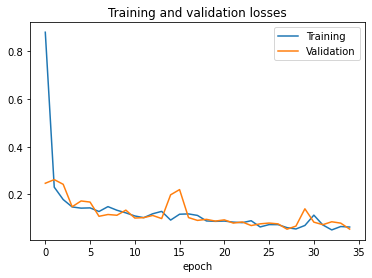

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

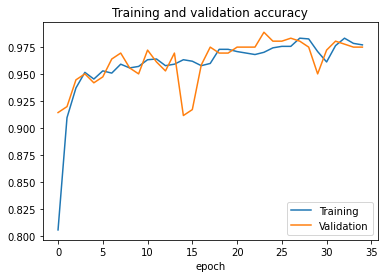

In [ ]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [ ]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 [==============================] - 10s 621ms/step - loss: 0.0816 - accuracy: 0.9711
Test Set Loss :  0.08161330968141556
Test Set Accuracy :  0.9710744023323059


# 9) PREDICTION ON NEW DATA (UPLOAD FILES)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  
  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving NORMAL(10).jpg to NORMAL(10).jpg
The report is COVID-19 Negative


In [ ]:
model.save("model.h5")